# Numpy Neural Network



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from mpl_toolkits.mplot3d import Axes3D
import random 

In [ ]:
data = [[0.5, 0.5, 0.5],
        [0.5, 1.0, 0.5],
        [1.0, 1.5, 1.5],
        [1.5, 1.0, 1.5],
        [1.5, 2.0, 2.0],
        [2.0, 0.5, 0.5],
        [2.5, 1.0, 1.5],
        [2.0, 1.5, 1.5],
        [2.5, 2.0, 1.5],
        [3.0, 0.5, 2.5],
        [2.5, 3.0, 3.0],
        [2.5, 3.5, 3.0],
        [3.0, 4.0, 3.5],
        [3.5, 1.5, 3.0],
        [3.5, 2.5, 3.5],
        [3.5, 3.5, 3.0],
        [4.0, 2.0, 5.0],
        [4.0, 3.0, 5.0],
        [4.5, 2.5, 4.0],
        [4.5, 3.5, 3.5]]

labels = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

test_data = [[4.5, 3.0, 4.0],
             [4.0, 3.5, 4.0],
             [4.0, 4.0, 4.0],
             [3.0, 3.0, 3.0],
             [3.5, 3.0, 4.0],
             [4.0, 2.5, 4.0],
             [1.0, 1.0, 1.0],
             [.25, 0.5, 3.0],
             [1.0, 0.5, 2.0],
             [1.5, 0.5, 2.0],
             [2.0, 1.0, 1.0],
             [2.5, 1.5, 4.0],]

test_labels = [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]


data:


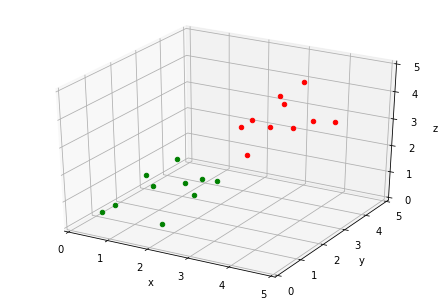

test_data:


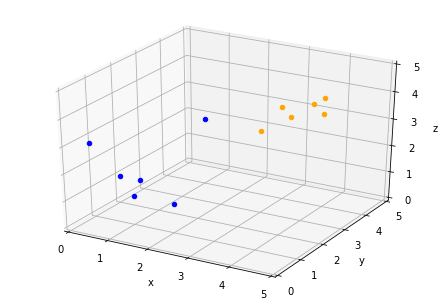

In [ ]:
def plt3d():
    fig = plt.figure()
    ax = Axes3D(fig)
    plt.grid()
    axes = plt.gca()
    axes.set_xlim([0, 5])
    axes.set_ylim([0, 5])
    axes.set_zlim([0, 5])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
    for i in range(len(data)):
        color = 'red'
        if labels[i] == 0:
            color = 'green'
        ax.scatter(data[i][0], data[i][1], data[i][2], c=color)
    plt.show()

def plt3d_test():
    fig = plt.figure()
    ax = Axes3D(fig)
    plt.grid()
    axes = plt.gca()
    axes.set_xlim([0, 5])
    axes.set_ylim([0, 5])
    axes.set_zlim([0, 5])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    for j in range(len(test_data)):
        color = 'orange'
        if test_labels[j] == 0:
            color = 'blue'
        ax.scatter(test_data[j][0], test_data[j][1], test_data[j][2], c=color)
    plt.show()

print('data:')
plt3d()
print('test_data:')
plt3d_test()

In [ ]:
# Sigmoid activation function
def sigmoid(x):
    y = 1/(1 + np.exp(-x))
    return y

# derivative of the sigmoid function
def d_sigmoid(x):
    y = sigmoid(x)*(1-sigmoid(x))
    return y

In [ ]:
# Average of a list
def avg(list):
    sumOfNumbers = 0
    for t in list:
        sumOfNumbers = sumOfNumbers + t

    avg = sumOfNumbers / len(list)
    return avg

In [ ]:
# Plot fuction to plot the loss
def plt_loss(loss):
    figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
    plt.grid()
    axes = plt.gca()
    #axes.set_ylim([0, 1])
    plt.plot(loss)

In [ ]:
def train(w, b, iterations, learning_rate, batch_size_loss):
    loss, w, b, able_w = back_prop(w, b, iterations, learning_rate, batch_size_loss)


    training_starts = 0

    if able_w == False:
        print('assigning new weights and starting again...')
        np.random.seed(random.randint(1,20))
        w = np.random.randn(num_weights,)
        loss, w, b, able_w = back_prop(w, b, iterations, learning_rate, batch_size_loss)
        training_starts += 1


    med_list = [max(loss), min(loss)]
    med = avg(med_list)
    index_10 = int(len(loss)*.1)
    avg_loss_10 = avg(loss[-index_10:])

    if training_starts == 1 and ((avg_loss_10/med > .9) or (loss[len(loss)-1]/loss[0] > .9)):
        print('')
        print('FAILED!')
        print('The training process ran two times and both failed because it did not improve over the first 30%.')
        print('Reasons for that:')
        print('1.  The randomly selected weights were to far off. Running it again would most likly solve the problem.')
        print('2.  The learning rate is too small/large for the number of iterations.')
        print('3.  The batch size for the loss calculation is too large for the number of iterations.')
        print('')

    if avg_loss_10/med <= .90:
        print('Success!')


    return loss, w, b

In [ ]:
def back_prop(w, b, iters, lr, batch_loss_size):
    w.shape = (num_weights,)
    loss = []
    batch_loss = []

    able_w = True

    for i in range(iters):
        if iters >= 150000:
            if i / iters == .25:
                print('25% done.')
            if i / iters == .5:
                print('50% done..')
            if i / iters == .75:
                print('75% done...')

        data_index = np.random.randint(len(data))
        data_point = data[data_index]
        label = labels[data_index]

        z = np.dot(w, data_point) + b
        a = sigmoid(z)
        y = label
        c = np.square(a - y)

        # derivatives
        dc_dw = []
        for j in range(len(data_point)):
            dc_dw.append(data_point[j]*d_sigmoid(z)*2*(a-y))
        dc_db = d_sigmoid(z)*2*(a-y)


        # change weights
        for k in range(len(w)):
            w[k] = w[k] - lr * dc_dw[k]
        b = b - lr * dc_db


        # to track loss and draw the loss graph
        batch_loss.append(c)
        if len(batch_loss) == batch_loss_size:
            loss.append(avg(batch_loss))
            batch_loss = []

        # if there is no inprovement over the first 30% the training process stops and will start again with new weights and biases
        if (iters/batch_loss_size)*0.3 <= len(loss) <= (iters/batch_loss_size)*0.31:
            med_list = [max(loss), min(loss)]
            med = avg(med_list)
            index_10 = int(len(loss)*.1)
            avg_loss_10 = avg(loss[-index_10:])
            if (avg_loss_10/med > .9) or (loss[len(loss)-1]/loss[0] > .9):
                print('did not make any progess over the first 30%')
                able_w = False
                break
        if len(loss) == (iters/batch_loss_size):
            if loss[len(loss)-1]/loss[0] > .9:
                print('did not make any progess')
                able_w = False
                break


    return loss, w, b, able_w

Success!
Validation Loss:  [0.07850451]


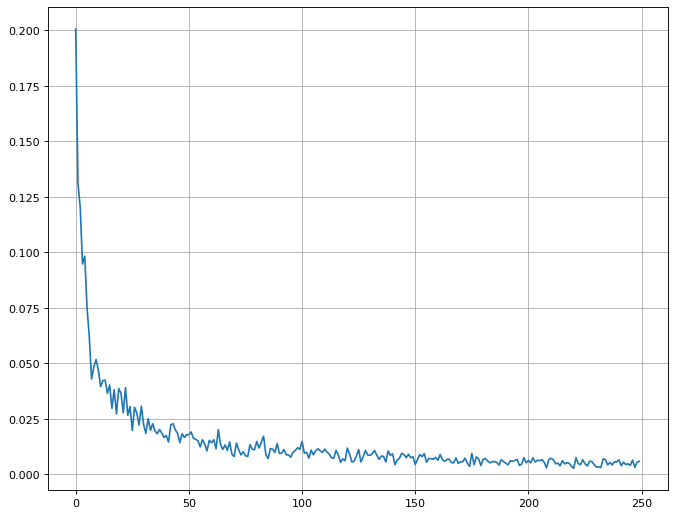

In [ ]:
# Number of weights (=number of imputs)
num_weights = 3
w = np.random.randn(num_weights,)
w = np.array(w)
b = [np.random.randn()]

# Hyperparameters Back.prop.
# interations:batch_size_loss >= 100 
iterations = 25000
learning_rate = .1
batch_size_loss = 100

loss, w, b = train(w, b, iterations, learning_rate, batch_size_loss)

plt_loss(loss)
print('Validation Loss: ', val_loss())

In [ ]:
def val_loss():
    val_loss_list = []
    val_loss = 0
    for i in range(len(test_data)):
        z = np.dot(w, test_data[i]) + b
        a = sigmoid(z)
        #print(a)
        y = test_labels[i]
        c = np.square(a - y)
        val_loss_list.append(c)
    val_loss = avg(val_loss_list)
    return val_loss

In [ ]:
def plt_result():
    fig = plt.figure()
    ax = Axes3D(fig)
    plt.grid()
    axes = plt.gca()
    axes.set_xlim([0, 5])
    axes.set_ylim([0, 5])
    axes.set_zlim([0, 5])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    for x in np.linspace(0, 5, 10):
        for y in np.linspace(0, 5, 10):
            for z in np.linspace(0, 5, 10):
                a = sigmoid(w[0] * x + w[1] * y  + w[2] * z + b)
                color = 'green'
                if a > .5:
                    color = 'red'
                ax.scatter(x, y, z, c=color, alpha=.5)

In [ ]:
def plt_plane():
    fig = plt.figure()
    ax = Axes3D(fig)
    plt.grid()
    axes = plt.gca()
    axes.set_xlim([0, 5])
    axes.set_ylim([0, 5])
    axes.set_zlim([0, 5])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    for x in np.linspace(0, 5, 50):
        for y in np.linspace(0, 5, 50):
            for z in np.linspace(0, 5, 50):
                a = sigmoid(w[0] * x + w[1] * y  + w[2] * z + b)
                if .49 <= a <= .51:
                    color = 'black'
                    alpha = 1
                    ax.scatter(x, y, z, c=color, alpha=alpha)

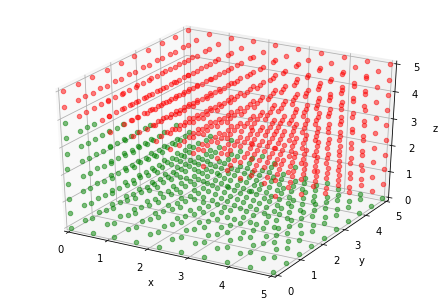

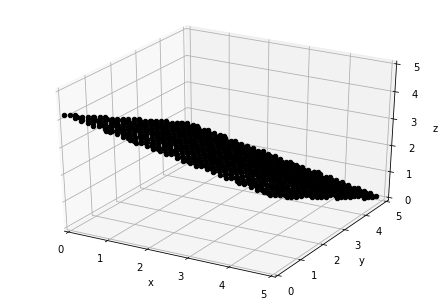

In [ ]:
plt_result()
plt_plane()